In [1]:
import pandas as pd
from keras import models
from keras.layers import Dense,Dropout
from keras.utils import to_categorical

In [2]:
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()
%matplotlib inline

In [3]:
import numpy as np

In [8]:
Data = pd.read_csv("C:\\Users\\Mazz Mirza\\Mazz\\Study\\Datasets\\breastcancer.csv")

In [9]:
Data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [12]:
Data.drop(['id','Unnamed: 32'],inplace=True,axis=1)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

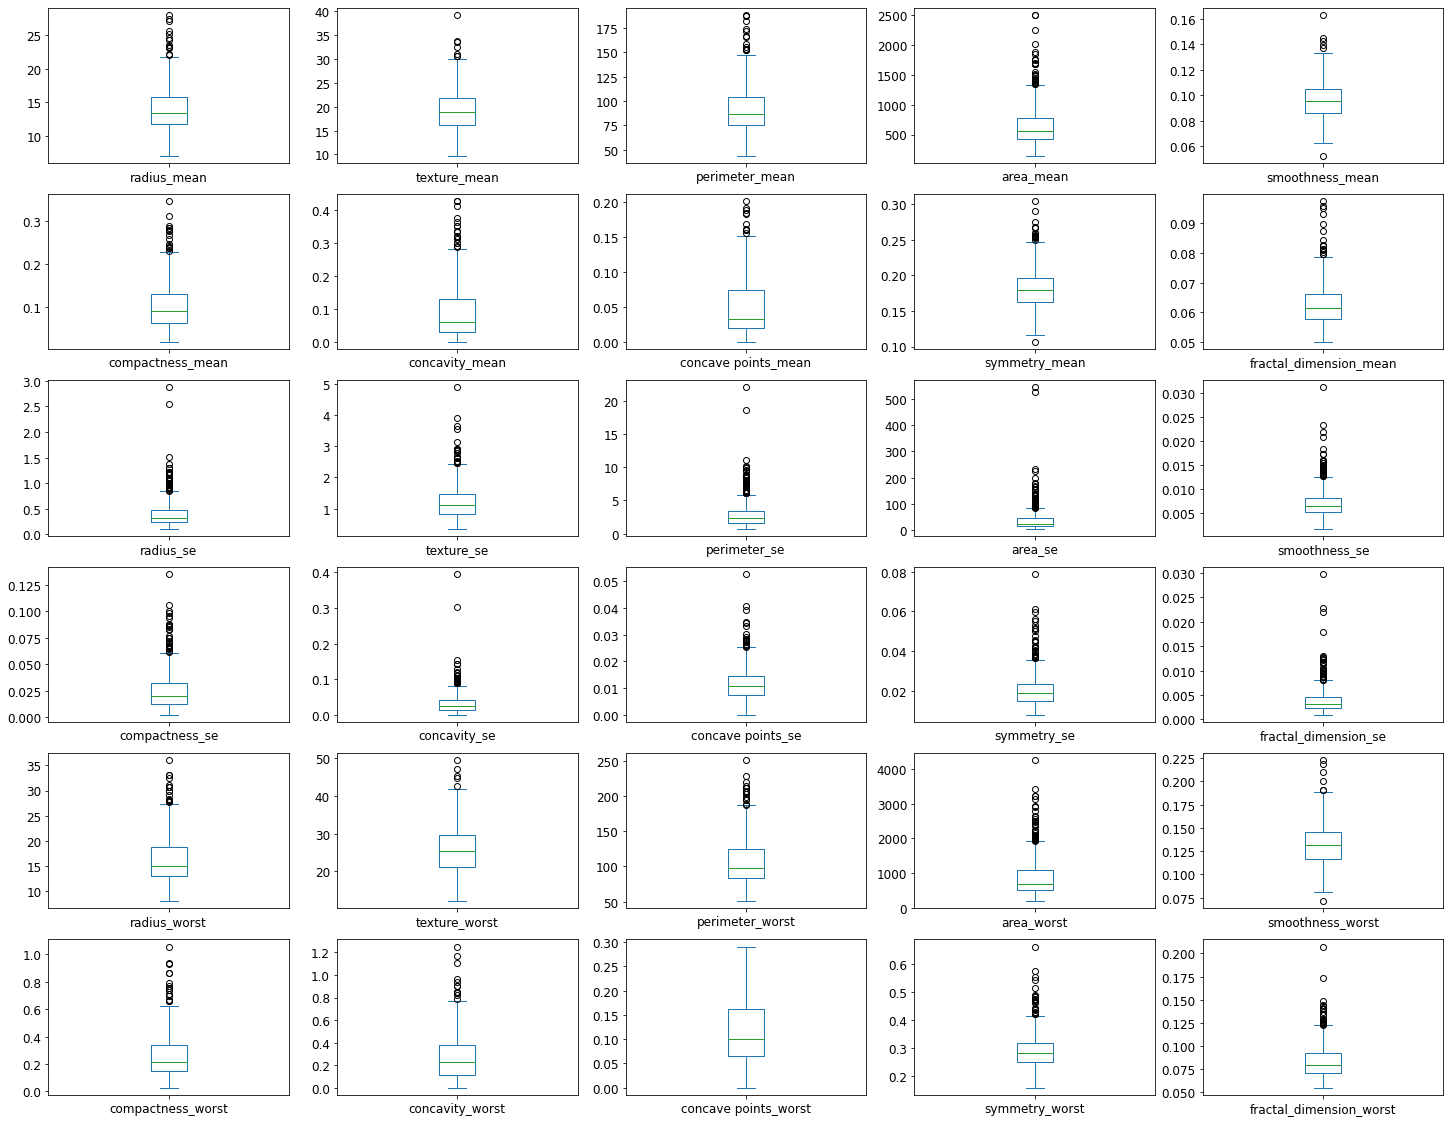

In [15]:
Data.plot(kind = 'box',subplots = True,layout = (6,5),fontsize = 12,figsize = (25,20))
plt.show()

In [16]:
# Creating Data audit Report
# creating a function that returns in-depth analysis | 
# describe() doesn't really  describe much 
def var_summary(x):
    uc= x.mean()+(2*x.std())
    lc=x.mean()-(2*x.std())
    outliers=[]
    for i in x:
        if i < lc or i > uc:
            outliers.append(i)
    number= len(outliers)
    outlier_flag= []
    if len(outliers) > 0:
        outlier_flag = "Y"
    else:
        outlier_flag = "N"
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(), x.std(), x.var(), 
    x.min(),x.quantile(0.01),x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75),
    x.quantile(0.90),x.quantile(0.95),x.quantile(0.99), x.max(),lc,uc,outlier_flag,outliers,number],index=['Number of Records','Number of Missing Values','SUM','MEAN','MEDIAN','STD','VAR',
    'MIN','P1','P5','P10','P25/Q1','P50/Q2','P75/Q3','P90','P95','P99','MAX','LC','UC','Outlier_flag','Outliers','Number of outliers'])

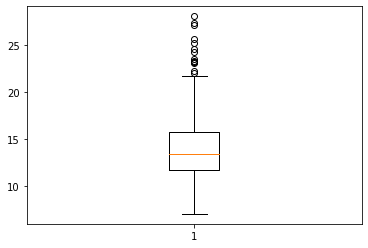

In [18]:
plt.boxplot(Data.radius_mean)
plt.show()

In [19]:
var_summary(Data.radius_mean)

Number of Records                                                         569
Number of Missing Values                                                    0
SUM                                                                  8038.429
MEAN                                                                14.127292
MEDIAN                                                                  13.37
STD                                                                  3.524049
VAR                                                                  12.41892
MIN                                                                     6.981
P1                                                                    8.45836
P5                                                                     9.5292
P10                                                                     10.26
P25/Q1                                                                   11.7
P50/Q2                                                          

In [ ]:
#replacing variables < Percentile 01 and > Percentile 99  with Percentile 01 and Percentile 99 respectively

In [20]:
Data.radius_mean = Data.radius_mean.clip(lower=Data.radius_mean.quantile(0.01),upper=Data.radius_mean.quantile(0.99))

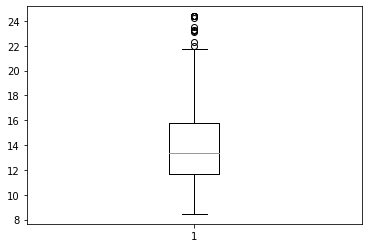

In [22]:
plt.boxplot(Data.radius_mean)
plt.show()

In [23]:
Data.area_mean = Data.area_mean.clip(lower=Data.area_mean.quantile(0.01),upper=Data.area_mean.quantile(0.99))
Data.radius_se = Data.radius_se.clip(lower=Data.radius_se.quantile(0.01),upper=Data.radius_se.quantile(0.99))
Data.perimeter_se = Data.perimeter_se.clip(lower=Data.perimeter_se.quantile(0.01),upper=Data.perimeter_se.quantile(0.99))
Data.area_se = Data.area_se.clip(lower=Data.area_se.quantile(0.01),upper=Data.area_se.quantile(0.99))
Data.symmetry_worst = Data.symmetry_worst.clip(lower=Data.symmetry_worst.quantile(0.01),upper=Data.symmetry_worst.quantile(0.99))
Data.fractal_dimension_worst = Data.fractal_dimension_worst.clip(lower=Data.fractal_dimension_worst.quantile(0.01),upper=Data.fractal_dimension_worst.quantile(0.99))
Data.concavity_se = Data.concavity_se.clip(lower=Data.concavity_se.quantile(0.01),upper=Data.concavity_se.quantile(0.99))
Data.fractal_dimension_se = Data.fractal_dimension_se.clip(lower=Data.fractal_dimension_se.quantile(0.01),upper=Data.fractal_dimension_se.quantile(0.99))

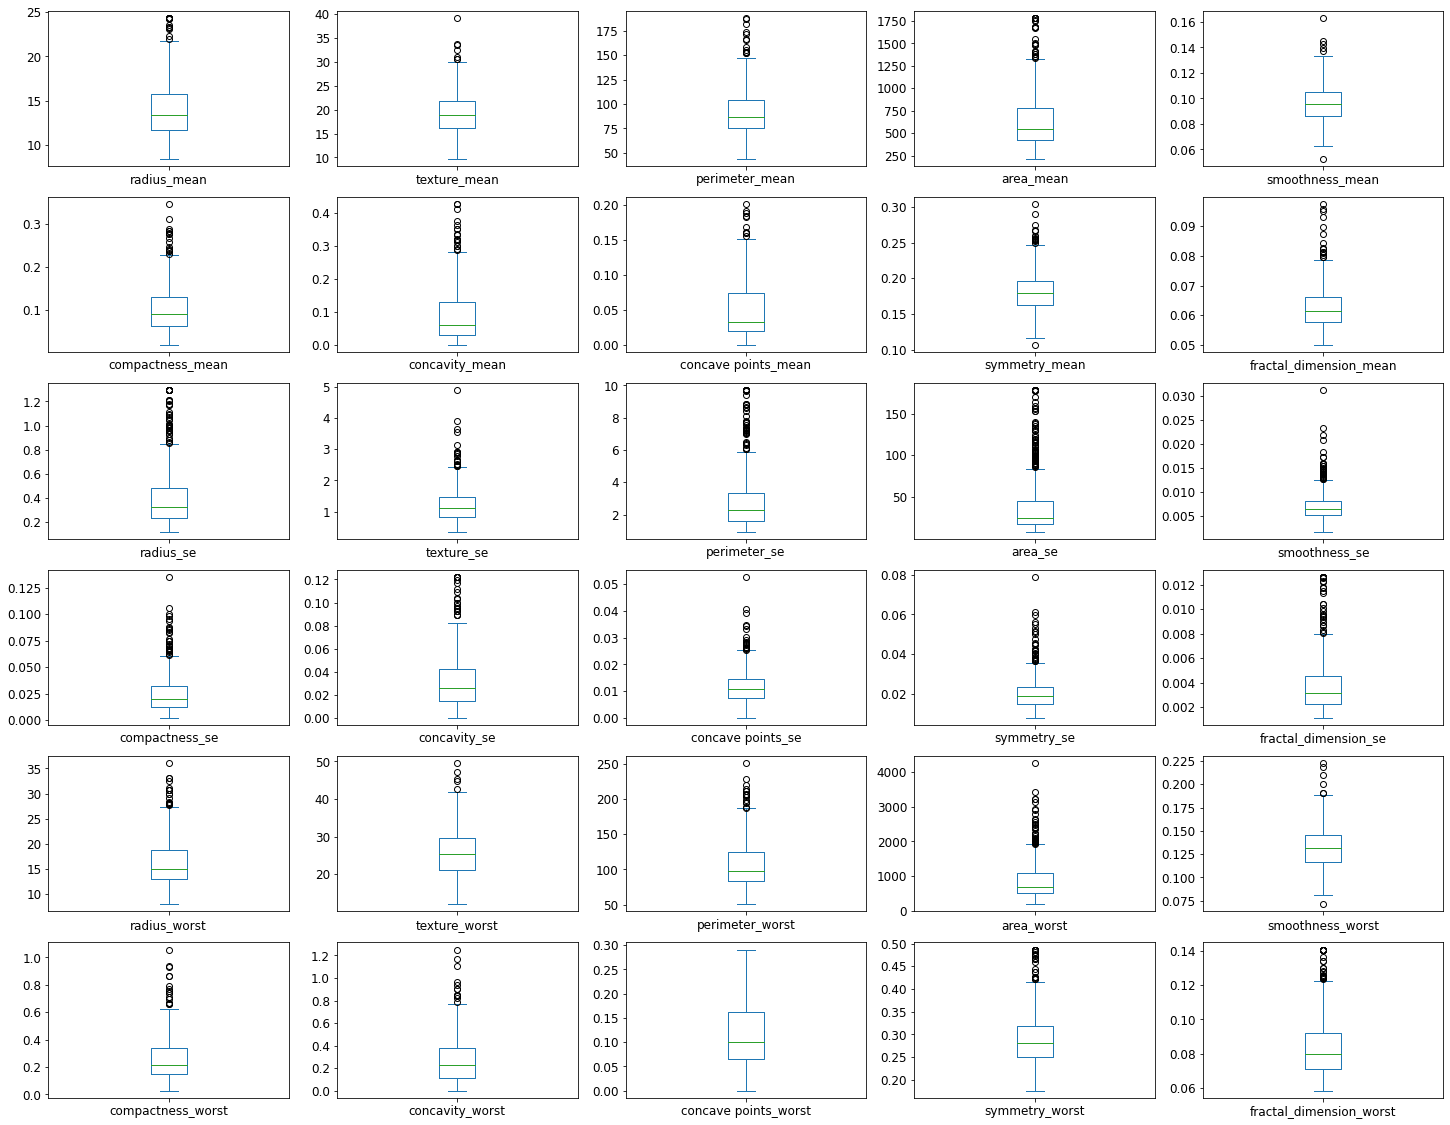

In [24]:
Data.plot(kind = 'box',subplots = True,layout = (6,5),fontsize = 12,figsize = (25,20))
plt.show()

In [33]:
X = Data.iloc[:,1:].values
y = Data.iloc[:,0]

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
label = LabelEncoder()
y = label.fit_transform(y)

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)

In [43]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [44]:
model = Sequential()
model.add(Dense(units=18,activation='relu',input_dim = 30))
model.add(Dropout(rate=0.1))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                558       
                                                                 
 dropout (Dropout)           (None, 18)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                190       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 759
Trainable params: 759
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss="binary_crossentropy",optimizer = 'adam',metrics='accuracy')

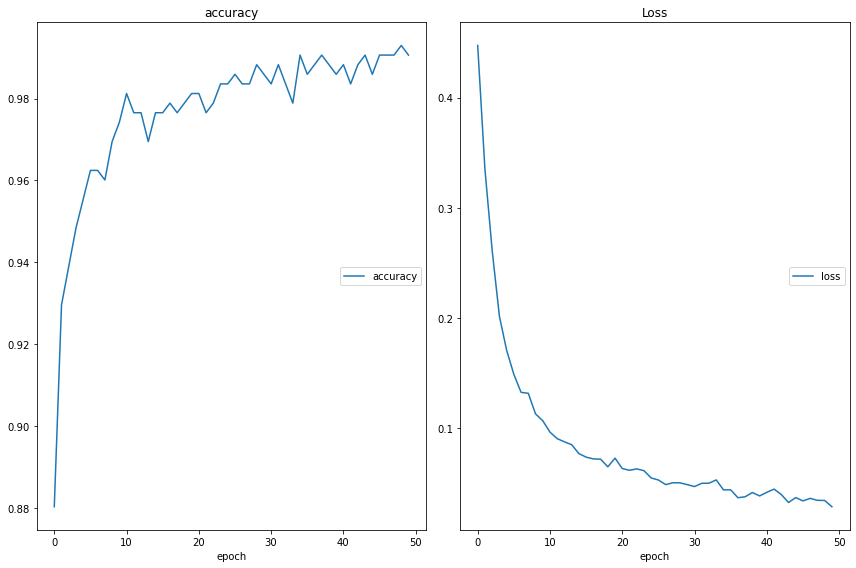

accuracy
	accuracy         	 (min:    0.880, max:    0.993, cur:    0.991)
Loss
	loss             	 (min:    0.029, max:    0.447, cur:    0.029)
15/15 [==============================] - 0s 14ms/step - loss: 0.0290 - accuracy: 0.9906


In [47]:
model.fit(X_train,y_train,batch_size=30,epochs=50,callbacks=[plot_losses],verbose=1)

In [53]:
y_pred = model.predict(X_test)>0.5

5/5 [==============================] - 0s 4ms/step


In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [54]:
confusion_matrix(y_test,y_pred)

array([[89,  0],
       [ 2, 52]], dtype=int64)

In [55]:
accuracy_score(y_test,y_pred)*100

98.6013986013986